In [2]:
# upgrade basic libraries, these are all pre-installed by colab but often with old versions
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader
!pip install --upgrade matplotlib
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import pandas_datareader.data as web

import matplotlib as mpl
from matplotlib import pyplot as plt

import yfinance as yf

# Basic Analaysis


## Exploratory stock analysis

In [ ]:
# declare start and end time
import datetime
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2017,1,11)

In [ ]:
# import the stock data of aapl from yahoo finance with the range of time stated
df = web.DataReader("AAPL", 'yahoo', start, end)
df.head(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537302
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464118
2010-01-11,7.607143,7.444643,7.600000,7.503929,462229600.0,6.407093
2010-01-12,7.491786,7.372143,7.471071,7.418571,594459600.0,6.334212


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1769.000000,1769.000000,1769.000000,1769.000000,1.769000e+03,1769.000000
mean,20.072649,19.697763,19.894219,19.888647,3.758507e+08,17.692292
std,7.150999,7.038787,7.095451,7.094345,2.409303e+08,6.741325
min,7.000000,6.794643,6.870357,6.858929,4.590360e+07,5.856372
25%,13.994286,13.714286,13.863571,13.886071,1.958040e+08,11.856368
50%,19.888929,19.457857,19.768572,19.686787,3.218404e+08,17.218298
75%,26.342501,25.782499,26.020000,26.084999,4.837532e+08,23.873837
max,33.634998,32.849998,33.615002,33.250000,1.880998e+09,30.118967


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1769 entries, 2010-01-04 to 2017-01-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1769 non-null   float64
 1   Low        1769 non-null   float64
 2   Open       1769 non-null   float64
 3   Close      1769 non-null   float64
 4   Volume     1769 non-null   float64
 5   Adj Close  1769 non-null   float64
dtypes: float64(6)
memory usage: 96.7 KB


## Moving Windows

In [7]:
# Isolate the closing prices
close_px = df['Adj Close']

# Calculate the moving average
mavg = close_px.rolling(window=100).mean()

# inspect the results
mavg.tail()

Date
2017-01-05    26.232371
2017-01-06    26.253438
2017-01-09    26.277268
2017-01-10    26.301753
2017-01-11    26.328064
Name: Adj Close, dtype: float64

## Visualising the moving average

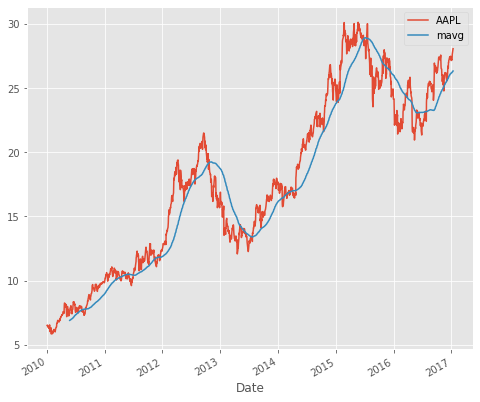

In [8]:
%matplotlib inline
plt.style.use('ggplot')
mpl.rc('figure', figsize=(8,7))
close_px.plot(label='AAPL'), mavg.plot(label='mavg')
plt.legend()

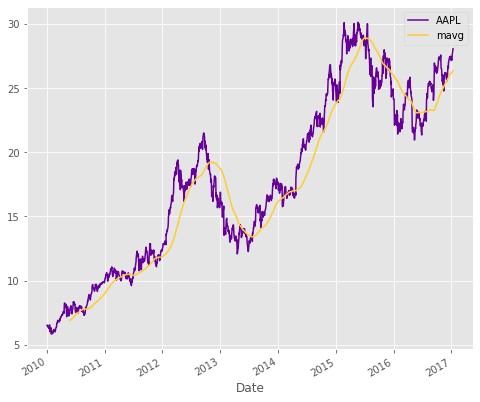

In [9]:
# changing the default colors
close_px.plot(label='AAPL', color='#660099'), mavg.plot(label='mavg', color='#FFCC33')
plt.legend()

## Visualising stock volatility using standard deviations

[*********************100%***********************]  1 of 1 completed


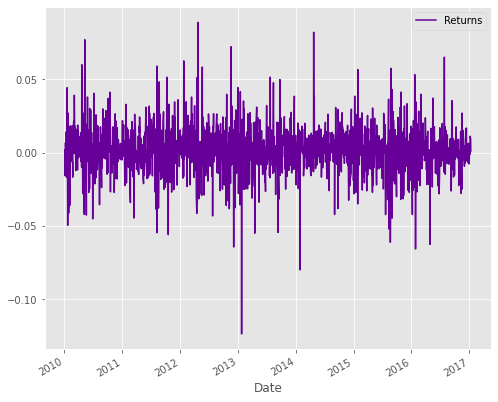

In [10]:
# set a ticker symbol and download the required stock data
ticker = 'AAPL'

# download stock data by using yfinance module
stock_data = yf.download(ticker, start, end)

# stock investment return can be calculated as the percentage change
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'].plot(color='#660099')
plt.legend()

## Histogram

((array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   1.,
           1.,   1.,   3.,   1.,   1.,   3.,   7.,   2.,   9.,   7.,  10.,
          16.,  35.,  27.,  36.,  41.,  60.,  79.,  95., 145., 158., 149.,
         148., 143., 120.,  97.,  94.,  80.,  54.,  24.,  28.,  21.,  20.,
           8.,   6.,   9.,   4.,   2.,   2.,   4.,   1.,   2.,   3.,   1.,
           1.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.]),
  array([-12.35577583, -12.07271008, -11.78964433, -11.50657858,
         -11.22351283, -10.94044708, -10.65738133, -10.37431557,
         -10.09124982,  -9.80818407,  -9.52511832,  -9.24205257,
          -8.95898682,  -8.67592107,  -8.39285532,  -8.10978957,
          -7.82672382,  -7.54365807,  -7.26059232,  -6.97752657,
          -6.69446082,  -6.41139507,  -6.12832932,  -5.84526357,
          -5.56219782,  -5.27913207,  -4.99606632,  -4.71300057,
          -4.42993482,  -4.146

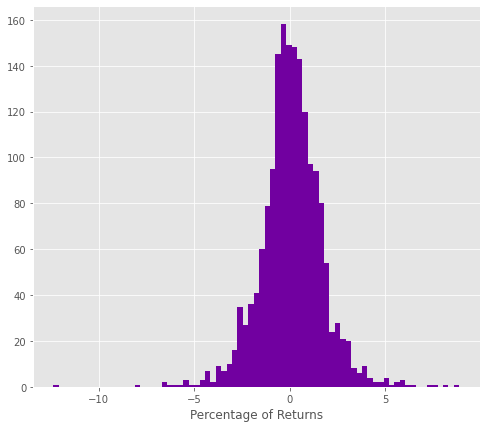

In [11]:
#this calculates the histogram which shows the distribution of returns
returns_percent = stock_data['Returns'] * 100
returns_percent.dropna(inplace=True)
plt.hist(returns_percent, bins=75, color='#7100a0'), plt.xlabel("Percentage of Returns")

# Using moments for further analysis

## Mean

In [13]:
# numpy: performs numerical calculations
import numpy as np

# the mean of daily and annual returns(first moment)
daily_mean_returns = np.mean(stock_data['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: 0.0009587518570707644
Annual Mean Returns: 0.2731443696143254


## Variance

In [15]:
# find the daily and annual std first
daily_std = np.std(stock_data['Returns'])
print("Daily Standard Deviation " + str(daily_std))
annual_std = daily_std*np.sqrt(252)
print("Annual Standard Deviation " + str(annual_std ))

# backslash n stands for a new line
print('\n')

# this finds the daily and annual variance
daily_var= daily_std**2
print("Daily Variance " + str(daily_var))
annual_var = annual_std**2
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.01647781844749121
Annual Standard Deviation 0.261577258565605


Daily Variance 0.0002715185007884816
Annual Variance 0.06842266219869737


## Skewness

In [16]:
# scipy: performs more stats, utility functions for optimization and signal processing
import scipy 
from scipy.stats import skew

#skewness is the third moment
returns = stock_data['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: -0.1219759506211888


# Risk assessment for different trends

## Increasing stock model

In [17]:
# redefine the time range
start = datetime.datetime(2014,4,22)
end = datetime.datetime(2014,5,7)

# repeating the method when finding the returns
stock_data = yf.download(ticker, start, end)
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-30 00:00:00-04:00,21.165714,21.408215,21.064285,21.074642,18.721449,456640800
2014-05-01 00:00:00-04:00,21.142857,21.242857,20.941429,21.124287,18.765554,244048000
2014-05-02 00:00:00-04:00,21.155001,21.221430,21.061071,21.163570,18.800449,191514400
2014-05-05 00:00:00-04:00,21.076429,21.464287,21.071428,21.462856,19.066315,287067200
2014-05-06 00:00:00-04:00,21.492857,21.586071,21.228930,21.228930,18.858507,374564400


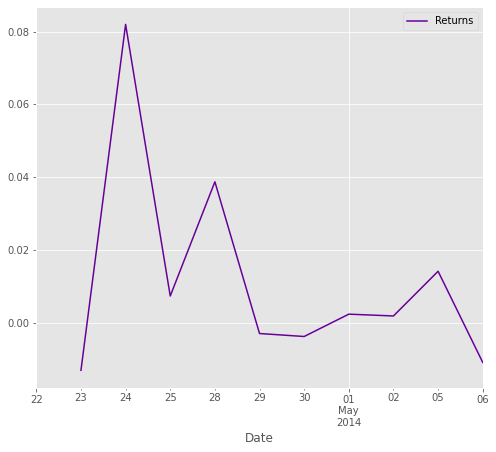

In [18]:
# plot the graph of returns
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'].plot(color='#660099')
plt.legend()

((array([1., 1., 0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1.]),
  array([-1.30711875, -1.18038155, -1.05364435, -0.92690715, -0.80016996,
         -0.67343276, -0.54669556, -0.41995837, -0.29322117, -0.16648397,
         -0.03974677,  0.08699042,  0.21372762,  0.34046482,  0.46720202,
          0.59393921,  0.72067641,  0.84741361,  0.9741508 ,  1.100888  ,
          1.2276252 ,  1.3543624 ,  1.48109959,  1.60783679,  1.73457399,
          1.86131118,  1.98804838,  2.11478558,  2.24152278,  2.36825997,
          2.49499717,  2.62173437,  2.74847156,  2.87520876,  3.00194596,
          3.12868316,  3.25542035,  3.38215755,  3.50889475,  3.63563194,
          3.76236914,  3.88910634,  4.01584354,  4.14258073, 

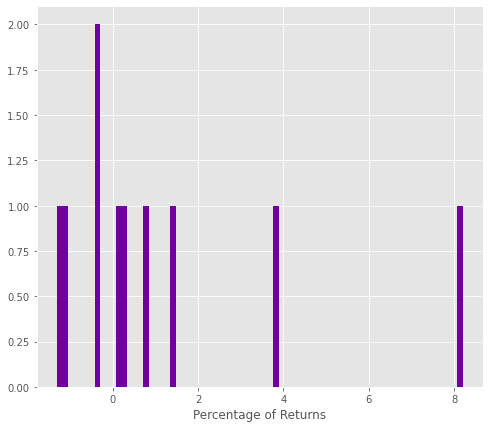

In [19]:
# find the histogram
returns_percent = stock_data['Returns'] * 100
returns_percent.dropna(inplace=True)
plt.hist(returns_percent, bins=75, color='#7100a0'), plt.xlabel("Percentage of Returns")

In [20]:
# repeating the methods when finding the three statistical moments
import numpy as np

# first moment - annual mean returns
daily_mean_returns = np.mean(stock_data['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: 0.01156963331179267
Annual Mean Returns: 17.152542909040246


In [21]:
# second moment - annual variance
daily_std = np.std(stock_data['Returns'])
print("Daily Standard Deviation " + str(daily_std))
annual_std = daily_std*np.sqrt(252)
print("Annual Standard Deviation " + str(annual_std ))

print('\n')

daily_var= daily_std**2
print("Daily Variance " + str(daily_var))
annual_var = annual_std**2
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.027309264635494324
Annual Standard Deviation 0.4335211362814138


Daily Variance 0.0007457959349314609
Annual Variance 0.18794057560272817


In [22]:
import scipy
from scipy.stats import skew

# third moment - skewness
returns = stock_data['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: 1.6417498944905877


## Decreasing stock model

In [23]:
# get the data for returns
start = datetime.datetime(2016,4,13)
end = datetime.datetime(2016,4,27)
stock_data = yf.download(ticker, start, end)
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-20 00:00:00-04:00,26.660000,27.022499,26.514999,26.782499,24.692825,122444000
2016-04-21 00:00:00-04:00,26.732500,26.732500,26.379999,26.492500,24.425457,126210000
2016-04-22 00:00:00-04:00,26.252501,26.620001,26.155001,26.420000,24.358614,134732400
2016-04-25 00:00:00-04:00,26.250000,26.412500,26.127501,26.270000,24.220318,112126400
2016-04-26 00:00:00-04:00,25.977501,26.325001,25.977501,26.087500,24.052053,224064800


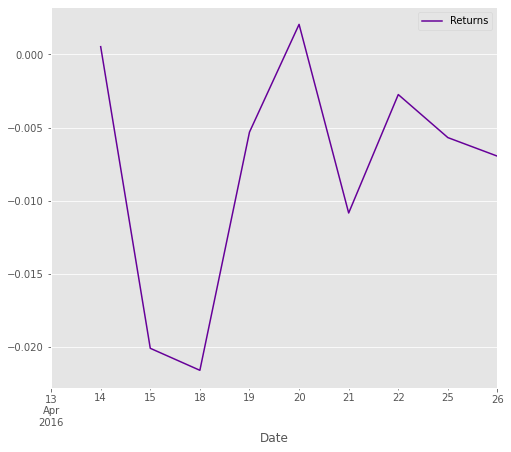

In [24]:
# plot the return graph
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'].plot(color='#660099')
plt.legend()

((array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 1.]),
  array([-2.15749282, -2.1259825 , -2.09447218, -2.06296187, -2.03145155,
         -1.99994124, -1.96843092, -1.9369206 , -1.90541029, -1.87389997,
         -1.84238965, -1.81087934, -1.77936902, -1.74785871, -1.71634839,
         -1.68483807, -1.65332776, -1.62181744, -1.59030712, -1.55879681,
         -1.52728649, -1.49577617, -1.46426586, -1.43275554, -1.40124523,
         -1.36973491, -1.33822459, -1.30671428, -1.27520396, -1.24369364,
         -1.21218333, -1.18067301, -1.1491627 , -1.11765238, -1.08614206,
         -1.05463175, -1.02312143, -0.99161111, -0.9601008 , -0.92859048,
         -0.89708016, -0.86556985, -0.83405953, -0.80254922, 

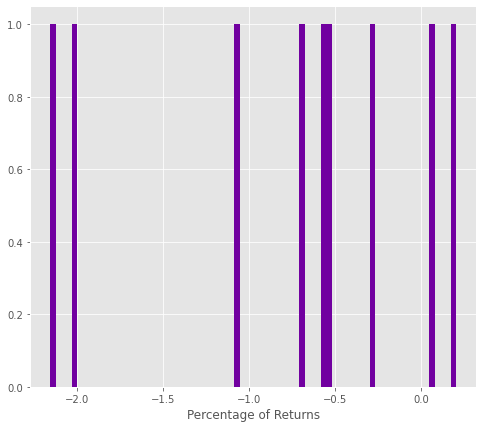

In [25]:
# histogram
returns_percent = stock_data['Returns'] * 100
returns_percent.dropna(inplace=True)
plt.hist(returns_percent, bins=75, color='#7100a0'), plt.xlabel("Percentage of Returns")

In [26]:
# first moment
import numpy as np

daily_mean_returns = np.mean(stock_data['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: -0.007838403825492588
Annual Mean Returns: -0.8623526046452425


In [27]:
# second moment
daily_std = np.std(stock_data['Returns'])
print("Daily Standard Deviation " + str(daily_std))
annual_std = daily_std*np.sqrt(252)
print("Annual Standard Deviation " + str(annual_std ))

print('\n')

daily_var= daily_std**2
print("Daily Variance " + str(daily_var))
annual_var = annual_std**2
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.007840406155051138
Annual Standard Deviation 0.12446258918403261


Daily Variance 6.147196867616377e-05
Annual Variance 0.015490936106393271


In [28]:
# third moment
import scipy
from scipy.stats import skew

returns = stock_data['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: -0.630072537239406


## Relatively stable stock model

In [29]:
# get the data for returns
start = datetime.datetime(2014,1,29)
end = datetime.datetime(2014,2,15)
stock_data = yf.download(ticker, start, end)
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-10 00:00:00-05:00,18.523571,18.999643,18.500000,18.892500,16.782969,345559200
2014-02-11 00:00:00-05:00,18.950357,19.205357,18.910713,19.141430,17.004095,282256800
2014-02-12 00:00:00-05:00,19.176786,19.270000,19.044287,19.139999,17.002829,308100800
2014-02-13 00:00:00-05:00,19.094999,19.458929,19.078571,19.443930,17.272820,307398000
2014-02-14 00:00:00-05:00,19.373928,19.499287,19.328930,19.428213,17.258862,272924400


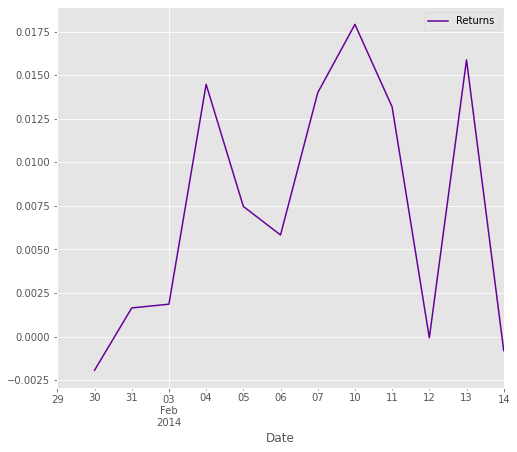

In [30]:
# plot the return graph
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'].plot(color='#660099')
plt.legend()

((array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 1.]),
  array([-0.19371226, -0.16724271, -0.14077317, -0.11430362, -0.08783408,
         -0.06136453, -0.03489498, -0.00842544,  0.01804411,  0.04451365,
          0.0709832 ,  0.09745274,  0.12392229,  0.15039183,  0.17686138,
          0.20333092,  0.22980047,  0.25627001,  0.28273956,  0.30920911,
          0.33567865,  0.3621482 ,  0.38861774,  0.41508729,  0.44155683,
          0.46802638,  0.49449592,  0.52096547,  0.54743501,  0.57390456,
          0.6003741 ,  0.62684365,  0.65331319,  0.67978274,  0.70625229,
          0.73272183,  0.75919138,  0.78566092,  0.81213047,  0.83860001,
          0.86506956,  0.8915391 ,  0.91800865,  0.94447819, 

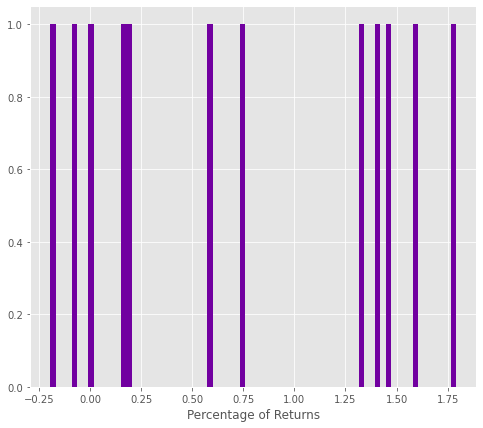

In [31]:
# histogram
returns_percent = stock_data['Returns'] * 100
returns_percent.dropna(inplace=True)
plt.hist(returns_percent, bins=75, color='#7100a0'), plt.xlabel("Percentage of Returns")

In [32]:
# first moment
import numpy as np

daily_mean_returns = np.mean(stock_data['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: 0.007451005292547404
Annual Mean Returns: 5.492792306740242


In [33]:
# second moment
daily_std = np.std(stock_data['Returns'])
print("Daily Standard Deviation " + str(daily_std))
annual_std = daily_std*np.sqrt(252)
print("Annual Standard Deviation " + str(annual_std ))

print('\n')

daily_var= daily_std**2
print("Daily Variance " + str(daily_var))
annual_var = annual_std**2
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.00698848893078803
Annual Standard Deviation 0.11093882250595687


Daily Variance 4.883897753574682e-05
Annual Variance 0.012307422339008202


In [34]:
# third moment
import scipy
from scipy.stats import skew

returns = stock_data['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: 0.089347060190772
